In [5]:
#Импортирование всех необходимых библиотек

import pandas as pd #Необходима для работы с таблицами
import random
import numpy as np #Линейная алгебра
import seaborn as sns #Визуализация
import matplotlib.pyplot as plt #Визуализация
import quandl #Необходимо для загрузки котировок акций

%matplotlib inline

In [6]:
#Чтение TOP500 компаний S&P
list_of_companies = pd.read_html('https://en.wikipedia.org/wiki/List_of_S%26P_500_companies', header=0)[0]
list_of_companies=list_of_companies.drop(['SEC filings','CIK','Date first added[3][4]'],axis=1)
list_of_companies.head(10)

,Ticker symbol,Security,GICS Sector,GICS Sub Industry,Location,Founded
0,MMM,3M Company,Industrials,Industrial Conglomerates,"St. Paul, Minnesota",1902
1,ABT,Abbott Laboratories,Health Care,Health Care Equipment,"North Chicago, Illinois",1888
2,ABBV,AbbVie Inc.,Health Care,Pharmaceuticals,"North Chicago, Illinois",2013 (1888)
3,ABMD,ABIOMED Inc,Consumer Discretionary,"Hotels, Resorts & Cruise Lines","Danvers, Massachusetts",1981
4,ACN,Accenture plc,Information Technology,IT Consulting & Other Services,"Dublin, Ireland",1989
5,ATVI,Activision Blizzard,Information Technology,Home Entertainment Software,"Santa Monica, California",2008
6,AYI,Acuity Brands Inc,Industrials,Electrical Components & Equipment,"Atlanta, Georgia",2001
7,ADBE,Adobe Systems Inc,Information Technology,Application Software,"San Jose, California",1982
8,AMD,Advanced Micro Devices Inc,Information Technology,Semiconductors,"Sunnyvale, California",1969
9,AAP,Advance Auto Parts,Consumer Discretionary,Automotive Retail,"Roanoke, Virginia",1932


In [7]:
#Selecting chosen companies
chs=pd.DataFrame()
chosen_companies=['AAPL','GOOGL','CSCO','FB','MSFT','AMZN']
for com in chosen_companies:
    chs=chs.append(list_of_companies[list_of_companies['Ticker symbol']==com])
chs

,Ticker symbol,Security,GICS Sector,GICS Sub Industry,Location,Founded
52,AAPL,Apple Inc.,Information Technology,"Technology Hardware, Storage & Peripherals","Cupertino, California",NaN
27,GOOGL,Alphabet Inc Class A,Information Technology,Internet Software & Services,"Mountain View, California",NaN
115,CSCO,Cisco Systems,Information Technology,Communications Equipment,"San Jose, California",NaN
190,FB,"Facebook, Inc.",Information Technology,Internet Software & Services,"Menlo Park, California",NaN
316,MSFT,Microsoft Corp.,Information Technology,Systems Software,"Redmond, Washington",NaN
30,AMZN,Amazon.com Inc.,Consumer Discretionary,Internet & Direct Marketing Retail,"Seattle, Washington",NaN


In [8]:
'AAPL' in list(list_of_companies['Ticker symbol'])

True

In [9]:
#Подключение к Quandl
quandl.ApiConfig.api_key='DsNzPHqf1ffR8znxL8vH' 

#Скачиваем котировки акций выбранных компаний
database = quandl.get_table('WIKI/PRICES', ticker = chosen_companies, 
                        qopts = { 'columns': ['ticker', 'date', 'adj_close'] }, 
                        date = { 'gte': '2016-12-31', 'lte': '2018-04-06' }, paginate=True)
database=database.set_index('date')
database=database.pivot(columns='ticker')
database.columns=[col[1] for col in database.columns]
database.head()

,AAPL,AMZN,CSCO,FB,GOOGL,MSFT
date,,,,,,
2017-01-03,114.715378,753.67,29.484966,116.86,808.01,61.219142
2017-01-04,114.586983,757.18,29.311184,118.69,807.77,60.945231
2017-01-05,115.169696,780.45,29.379349,120.67,813.02,60.945231
2017-01-06,116.453639,795.99,29.437777,123.41,825.21,61.473488
2017-01-09,117.520300,796.92,29.389087,124.90,827.18,61.277837


In [10]:
#Статистические данные компаний
database.describe()

,AAPL,AMZN,CSCO,FB,GOOGL,MSFT
count,308.000000,308.000000,309.000000,309.000000,309.000000,309.000000
mean,154.137248,1056.016477,34.561414,161.041909,972.251707,75.098922
std,16.431586,212.041910,4.422415,18.533051,97.770997,10.431308
min,114.586983,753.670000,29.194329,116.860000,807.770000,60.945231
25%,142.632720,908.865000,31.268829,145.470000,888.840000,66.755757
50%,154.891536,984.955000,33.186882,167.740000,964.810000,72.593946
75%,169.390500,1162.795000,37.480000,177.360000,1048.470000,84.044612
max,181.720000,1598.390000,45.550000,193.090000,1187.560000,96.770000


Text(0.5,0,'Период времени')

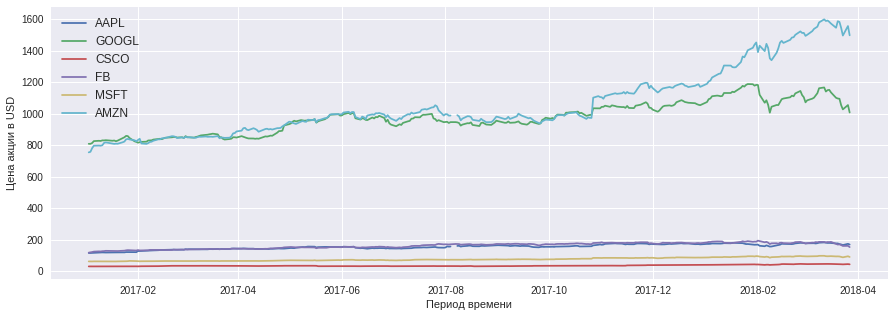

In [11]:
# График котировок акций выбранных компаний 
plt.figure(figsize=(15,5))
for company in chosen_companies:
    plt.plot(database[company])
plt.legend(loc='upper left', fontsize=12)
plt.ylabel('Цена акции в USD')
plt.xlabel('Период времени')

In [12]:
# База данных по доходностям
returns_database=database.pct_change()
returns_database.head()

,AAPL,AMZN,CSCO,FB,GOOGL,MSFT
date,,,,,,
2017-01-03,NaN,NaN,NaN,NaN,NaN,NaN
2017-01-04,-0.001119,0.004657,-0.005894,0.015660,-0.000297,-0.004474
2017-01-05,0.005085,0.030732,0.002326,0.016682,0.006499,0.000000
2017-01-06,0.011148,0.019912,0.001989,0.022707,0.014993,0.008668
2017-01-09,0.009160,0.001168,-0.001654,0.012074,0.002387,-0.003183


Text(0.5,0,'Период времени')

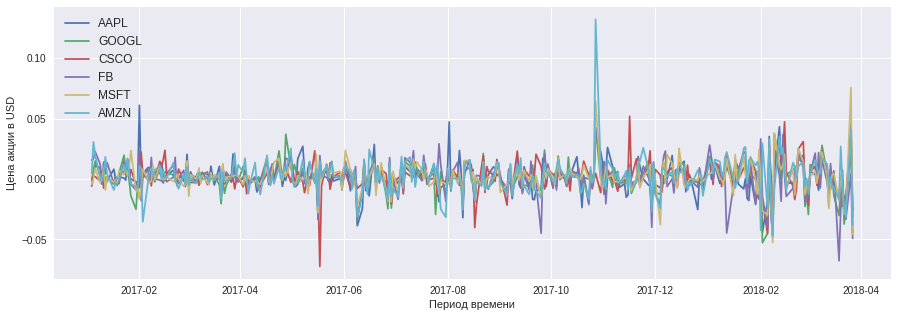

In [13]:
plt.figure(figsize=(15,5))
for company in chosen_companies:
    plt.plot(returns_database[company])
plt.legend(loc='upper left', fontsize=12)
plt.ylabel('Цена акции в USD')
plt.xlabel('Период времени')

In [14]:
#Дневные и годовые доходности и ковариации
daily_returns=returns_database.mean() 
daily_cov=returns_database.cov() 
annual_returns=daily_returns*250
annual_cov=daily_cov*250

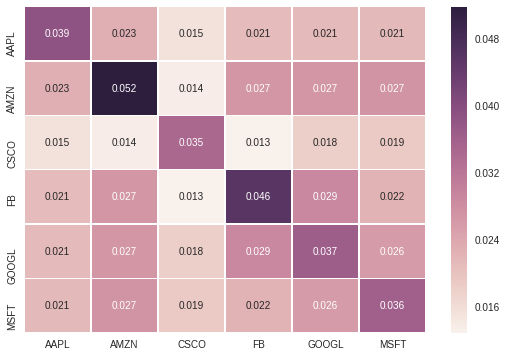

In [15]:
f, ax = plt.subplots(figsize=(9, 6))
sns.heatmap(annual_cov, annot=True, linewidths=.5, ax=ax)
#plt.show()
plt.savefig("out.svg", transparent = True)

In [16]:
#Задаем количество портфелей
assets_num=len(chosen_companies)
portfolios_num=50000

In [17]:
np.random.seed(101)

In [18]:
#Создаем пустые списки для доходности, волатильности, весов и коэффицента Шарпа для каждого из портфелей
portfolio_returns=[]
portfolio_volatility=[]
portfolio_weights=[]
sharpe_ratio=[]

In [19]:
#Создание 50000 потфелей с разными весами акций
for portfolio in range(portfolios_num):
    weights=np.random.random(assets_num)
    weights /= np.sum(weights)
    port_return=np.dot(weights,annual_returns)
    port_volatility=np.sqrt(np.dot(weights.T,np.dot(annual_cov,weights)))
    sharpe=port_return/port_volatility
    sharpe_ratio.append(sharpe)
    portfolio_returns.append(port_return)
    portfolio_volatility.append(port_volatility)
    portfolio_weights.append(weights)

In [20]:
#Создаем таблицу с портфелями
portfolio={'Доходность':portfolio_returns, 'Риск':portfolio_volatility, 'Коэффицент Шарпа':sharpe_ratio}
for counter,symbol in enumerate(chosen_companies):
    portfolio[symbol] = [Weight[counter]*100 for Weight in portfolio_weights]

In [21]:
df=pd.DataFrame(portfolio)
df.head()

,Доходность,Риск,Коэффицент Шарпа,AAPL,GOOGL,CSCO,FB,MSFT,AMZN
0,0.342206,0.166920,2.050124,18.401825,20.335695,1.014677,6.112161,24.419792,29.715850
1,0.371373,0.159394,2.329906,10.169759,29.605310,23.904674,6.292658,18.361503,11.666096
2,0.383342,0.157237,2.437993,6.376728,27.541386,33.847615,8.145784,2.929471,21.159016
3,0.333002,0.153277,2.172551,30.441172,11.535140,28.616921,21.625034,2.024610,5.757123
4,0.355868,0.163725,2.173566,5.255554,27.949740,14.635624,16.269462,20.655368,15.234253


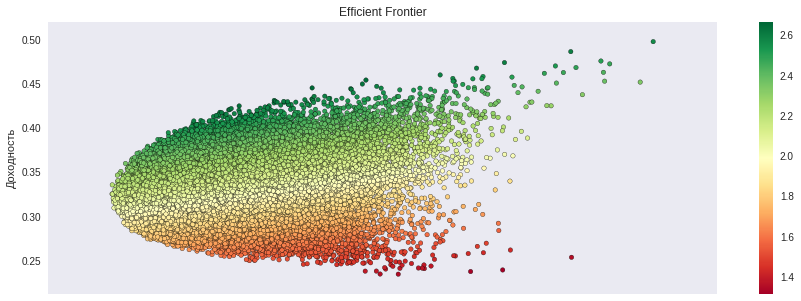

In [22]:
#Рисуем график портфелей 

plt.style.use('seaborn-dark')
df.plot.scatter(x='Риск',y='Доходность', c=sharpe_ratio, cmap='RdYlGn', edgecolors='black',figsize=(15,5))
plt.xlabel('Риск')
plt.ylabel('Доходность')
plt.title('Efficient Frontier')
plt.show()

In [23]:
#Выбираем портфели с максимальным коэффицентом Шарпа и минимальной волатильностью
min_volatility=df['Риск'].min()
max_sharp=df['Коэффицент Шарпа'].max()

min_vol_port=df[df['Риск']==min_volatility]
max_sharp_port=df[df['Коэффицент Шарпа']==max_sharp]

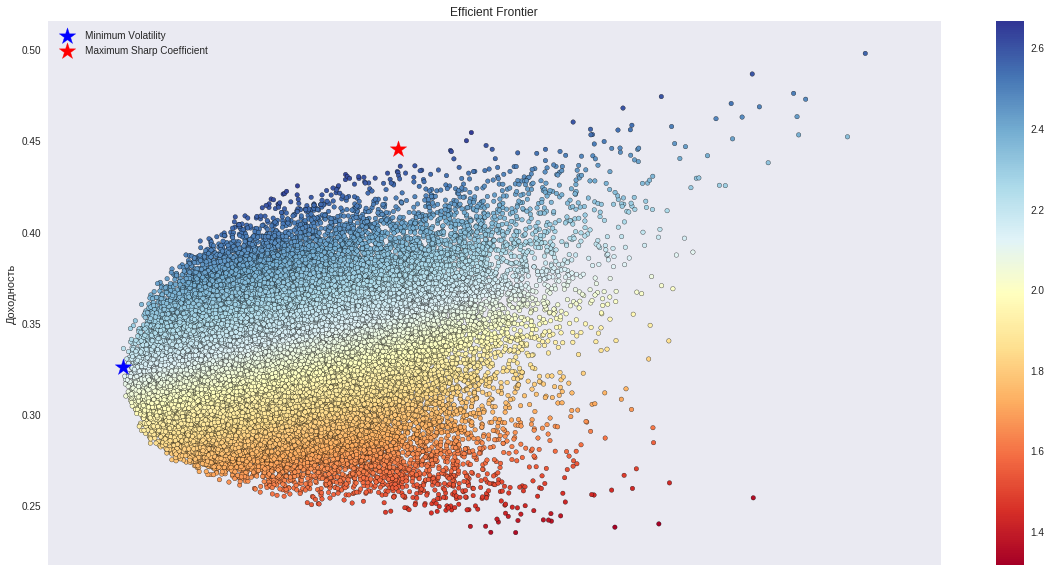

In [24]:
plt.style.use('seaborn-dark')
df.plot.scatter(x='Риск',y='Доходность', c=sharpe_ratio, cmap='RdYlBu', edgecolors='black',figsize=(20,10))
plt.scatter(x=min_vol_port['Риск'],y=min_vol_port['Доходность'], marker='*', c='Blue', s=300, label='Minimum Volatility')
plt.scatter(x=max_sharp_port['Риск'],y=max_sharp_port['Доходность'],  marker='*', c='Red', s=300, label='Maximum Sharp Coefficient')

plt.xlabel('Риск')
plt.ylabel('Доходность')
plt.title('Efficient Frontier')
plt.legend()
plt.show()

                  45177
Доходность         0.45
Риск               0.17
Коэффицент Шарпа   2.67
AAPL               4.78
GOOGL             48.81
CSCO              37.11
FB                 0.86
MSFT               1.92
AMZN               6.52


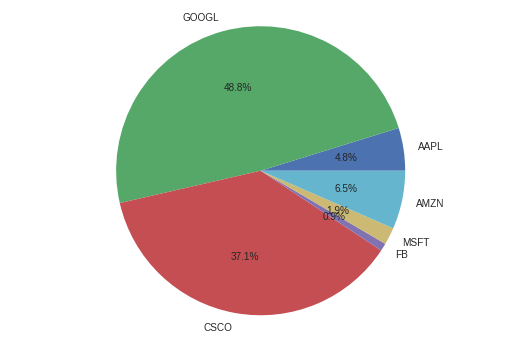

In [25]:
#Портфель с максимальным коэффицентом Шарпа
print(max_sharp_port.T.round(2))


labels=list(max_sharp_port.columns)[3:]
data=max_sharp_port.iloc[0,3:]


fig,ax=plt.subplots(figsize=(9,6))
ax.pie(data,labels=labels,autopct='%1.1f%%')
plt.axis('equal')
plt.show()

                  18979
Доходность         0.33
Риск               0.15
Коэффицент Шарпа   2.15
AAPL              20.73
GOOGL              9.47
CSCO              39.35
FB                16.17
MSFT               6.37
AMZN               7.91


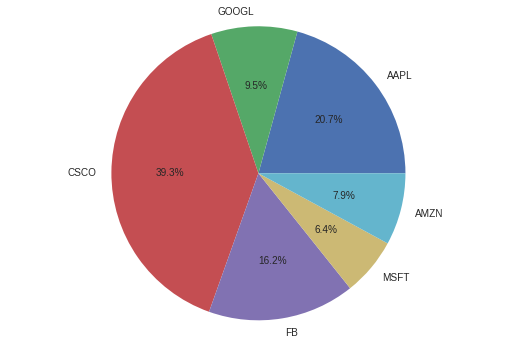

In [26]:
#Портфель с минимальной волатильностью
print(min_vol_port.T.round(2))


labels=list(min_vol_port.columns)[3:]
data=min_vol_port.iloc[0,3:]


fig,ax=plt.subplots(figsize=(9,6))
ax.pie(data,labels=labels,autopct='%1.1f%%')
plt.axis('equal')
plt.show()